In [1]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import pandas as pd
from difflib import SequenceMatcher
from matplotlib import pyplot as plt
import xml.etree.ElementTree as ET
import utils
import experiments

In [2]:
basedir = "urdu-english"
translation_csvs = [f for f in os.listdir(basedir) if f[0] == "B"]
gold_csvs = [f for f in os.listdir(basedir) if f[0] == "m"]
# edit_csvs = [f for f in os.listdir(basedir) if f[0] == "e"]

In [3]:
pd.set_option('display.max_columns', 800)

In [4]:
def eat_csv(csvfile):
    df = pd.read_csv(csvfile, sep=",", error_bad_lines=False)
    item = []
    label = []
    worker = []
    hit = []
    doc = []
    seg = []
    itemID = []
    status = []
    for index, row in df.iterrows():
        workerID = row["WorkerId"]
        hitID = row["HITId"]
        docID = row["Input.document"]
        asval = row["AssignmentStatus"]
        for i in range(1, 21):
            try:
                if asval != "aRejected":
                    colitem = row["Input.seg" + str(i)]
                    collabel = row["Answer.translation" + str(i)]
                    item.append(colitem)
                    label.append(collabel)
                    worker.append(workerID)
                    hit.append(hitID)
                    doc.append(docID)
                    seg.append(i)
                    itemID.append(str(docID) + "_" + str(i))
                    status.append(asval)
            except:
                pass
    return pd.DataFrame({"item":item, "itemID":itemID, "label":label, "worker":worker, "doc":doc, "seg":seg, "status":status, "hit":hit})

In [5]:
def eat_gold_csv(csvfile):
    tree = ET.parse(csvfile)
    root = tree.getroot()
    itemID = []
    goldtext = []
    for doc in root.iter("doc"):
        docId = doc.get("docid")
        for seg in doc.iter("seg"):
            segId = seg.get("id")
            text = seg.text
            itemID.append(str(docId) + "_" + str(segId))
            goldtext.append(text)
    return pd.DataFrame({"itemID":itemID, "goldtext":goldtext})

In [6]:
# def eatgold(goldcsv):
#     return pd.read_csv(goldcsv, sep=",", error_bad_lines=False)
# gold = pd.concat([eatgold(basedir + "/" + csv) for csv in edit_csvs], sort=False)
# gold[gold["AssignmentId"]=="5YSZ0CCB9JRZQ2X9WSAZ"]

In [7]:
urdu_df = pd.concat([eat_csv(basedir + "/" + csv) for csv in translation_csvs])

In [8]:
urdu_df = urdu_df.sort_values(["doc", "seg", "itemID"])
urdu_df#[urdu_df.duplicated('doc')]

,item,itemID,label,worker,doc,seg,status,hit
56,فرانس کی تجویز کی حمایت,BBC_URD_20090102.0020_1,France has supported the proposal.,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,1,Approved,5YSZ0CCB9JRZQ2X9WSAZ
57,کمیٹی کا اجلاس جمعہ کے روز پارلیمنٹ ہاؤس میں ک...,BBC_URD_20090102.0020_2,"The Chairman of the Committee of the Summit, ...",A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,2,Approved,5YSZ0CCB9JRZQ2X9WSAZ
58,اجلاس کے بعد میڈیا کے نمائندوں سے گفتگو کرتے ہ...,BBC_URD_20090102.0020_3,"After the meeting, Mushahid Hussain Syed said ...",A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,3,Approved,5YSZ0CCB9JRZQ2X9WSAZ
59,انہوں نے اسرائیل کی طرف سے فسلطینیوں پر حملے ک...,BBC_URD_20090102.0020_4,He said that the Israeli attack is a crime on ...,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,4,Approved,5YSZ0CCB9JRZQ2X9WSAZ
60,مشاہد حسین نے دنیا کے ممالک کے دوہرے معیار کو ...,BBC_URD_20090102.0020_5,Mushahid Hussain while criticizing the world t...,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,5,Approved,5YSZ0CCB9JRZQ2X9WSAZ
61,خارجہ امور کے بارے میں سینیٹ کی قائمہ کمیٹی کے...,BBC_URD_20090102.0020_6,The foreign affairs Minister in the Senate Sta...,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,6,Approved,5YSZ0CCB9JRZQ2X9WSAZ
62,انہوں نے کہا کہ کمیٹی نے اس اُمید کا اظہار کیا...,BBC_URD_20090102.0020_7,He said that the Committee expressed hope that...,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,7,Approved,5YSZ0CCB9JRZQ2X9WSAZ
63,مشاہد حسین سید نے کہا کہ مسلم اُمہ اور مغرب کے...,BBC_URD_20090102.0020_8,Mushahid Hussain Syed said that Muslims and th...,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,8,Approved,5YSZ0CCB9JRZQ2X9WSAZ
64,خارجہ امور کے وزیر مملکت ملک عماد خان نے کمیٹی...,BBC_URD_20090102.0020_9,"Imaduddin Khan, the Minister of External Affai...",A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,9,Approved,5YSZ0CCB9JRZQ2X9WSAZ
65,یہ ہنگامی اجلاس اسرائیل کی طرف سے فسلطین پر ہو...,BBC_URD_20090102.0020_10,The emergency meeting by Israel as the result ...,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,10,Approved,5YSZ0CCB9JRZQ2X9WSAZ


In [9]:
urdu_df[["item","label","itemID","worker","doc","seg"]]

,item,label,itemID,worker,doc,seg
56,فرانس کی تجویز کی حمایت,France has supported the proposal.,BBC_URD_20090102.0020_1,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,1
57,کمیٹی کا اجلاس جمعہ کے روز پارلیمنٹ ہاؤس میں ک...,"The Chairman of the Committee of the Summit, ...",BBC_URD_20090102.0020_2,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,2
58,اجلاس کے بعد میڈیا کے نمائندوں سے گفتگو کرتے ہ...,"After the meeting, Mushahid Hussain Syed said ...",BBC_URD_20090102.0020_3,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,3
59,انہوں نے اسرائیل کی طرف سے فسلطینیوں پر حملے ک...,He said that the Israeli attack is a crime on ...,BBC_URD_20090102.0020_4,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,4
60,مشاہد حسین نے دنیا کے ممالک کے دوہرے معیار کو ...,Mushahid Hussain while criticizing the world t...,BBC_URD_20090102.0020_5,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,5
61,خارجہ امور کے بارے میں سینیٹ کی قائمہ کمیٹی کے...,The foreign affairs Minister in the Senate Sta...,BBC_URD_20090102.0020_6,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,6
62,انہوں نے کہا کہ کمیٹی نے اس اُمید کا اظہار کیا...,He said that the Committee expressed hope that...,BBC_URD_20090102.0020_7,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,7
63,مشاہد حسین سید نے کہا کہ مسلم اُمہ اور مغرب کے...,Mushahid Hussain Syed said that Muslims and th...,BBC_URD_20090102.0020_8,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,8
64,خارجہ امور کے وزیر مملکت ملک عماد خان نے کمیٹی...,"Imaduddin Khan, the Minister of External Affai...",BBC_URD_20090102.0020_9,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,9
65,یہ ہنگامی اجلاس اسرائیل کی طرف سے فسلطین پر ہو...,The emergency meeting by Israel as the result ...,BBC_URD_20090102.0020_10,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,10


In [10]:
urdu_df = urdu_df.sort_values("itemID")
crowd_df = urdu_df[urdu_df.duplicated('itemID', keep=False)].dropna()
drop_rejected = True
if drop_rejected:
#     crowd_df = crowd_df[crowd_df["status"] == "Approved"]
    crowd_df = crowd_df[~crowd_df["label"].str.contains("sentence goes here.")]
print(crowd_df.shape)
crowd_df

(561, 8)


,item,itemID,label,worker,doc,seg,status,hit
130,مخلوط تعلیم پر پابندی: طالبان,BBC_URD_20090104.0004_1,The ban on education coalition: Taliban,AHENRCF0A2SNA,BBC_URD_20090104.0004,1,Rejected,XZDRNTZP2W7Y0NZBVWA0
140,مخلوط تعلیم پر پابندی: طالبان,BBC_URD_20090104.0004_1,Ban on coeducation: Taliban,A8V7WA74IOHZ9,BBC_URD_20090104.0004,1,Approved,XZDRNTZP2W7Y0NZBVWA0
149,زخمی کو بنوں سول ہسپتال میں داخل کردیاگیا ہے۔,BBC_URD_20090104.0004_10,Injured has been admitted in Civil Hospital.,A8V7WA74IOHZ9,BBC_URD_20090104.0004,10,Approved,XZDRNTZP2W7Y0NZBVWA0
139,زخمی کو بنوں سول ہسپتال میں داخل کردیاگیا ہے۔,BBC_URD_20090104.0004_10,The injured Bannu slaughtered admitted in civi...,AHENRCF0A2SNA,BBC_URD_20090104.0004,10,Rejected,XZDRNTZP2W7Y0NZBVWA0
131,شمالی وزیرستان کے صدر مقام میران شاہ اور دوسری...,BBC_URD_20090104.0004_2,"In North Waziristan Miran Shah, the president ...",AHENRCF0A2SNA,BBC_URD_20090104.0004,2,Rejected,XZDRNTZP2W7Y0NZBVWA0
141,شمالی وزیرستان کے صدر مقام میران شاہ اور دوسری...,BBC_URD_20090104.0004_2,Local Talibans of Gul Bahadur group have distr...,A8V7WA74IOHZ9,BBC_URD_20090104.0004,2,Approved,XZDRNTZP2W7Y0NZBVWA0
132,پمفلٹ میں کہاگیا ہے کہ اگر پانچ جنوری تک مخلوط...,BBC_URD_20090104.0004_3,Due to leakage in pamphlet on January 5 if the...,AHENRCF0A2SNA,BBC_URD_20090104.0004,3,Rejected,XZDRNTZP2W7Y0NZBVWA0
142,پمفلٹ میں کہاگیا ہے کہ اگر پانچ جنوری تک مخلوط...,BBC_URD_20090104.0004_3,Pamphlet included that if coeducation institut...,A8V7WA74IOHZ9,BBC_URD_20090104.0004,3,Approved,XZDRNTZP2W7Y0NZBVWA0
133,پمفلٹ میں کہاگیا ہے کہ سرکاری امداد اور دیگر ت...,BBC_URD_20090104.0004_4,Due to leakage in pahmphlet Government and oth...,AHENRCF0A2SNA,BBC_URD_20090104.0004,4,Rejected,XZDRNTZP2W7Y0NZBVWA0
143,پمفلٹ میں کہاگیا ہے کہ سرکاری امداد اور دیگر ت...,BBC_URD_20090104.0004_4,Pamphlet said that women are banned to have ID...,A8V7WA74IOHZ9,BBC_URD_20090104.0004,4,Approved,XZDRNTZP2W7Y0NZBVWA0


In [11]:
crowd_df.shape

(561, 8)

In [12]:
uiddict = utils.make_categorical(crowd_df, "worker")
itemdict = utils.make_categorical(crowd_df, "itemID")

In [13]:
gold_df = pd.concat([eat_gold_csv(basedir + "/" + csv) for csv in gold_csvs])
# gold_df[gold_df["itemID"]=="BBC_URD_20090104.0004_1"]

In [14]:
gold_df = utils.translate_categorical(gold_df, "itemID", itemdict)
assert len(gold_df) > 0
# de-duplicate!10

/Users/alexbraylan/Tools/crowd/utils.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  result[colname] = result[colname].astype(int)


In [15]:
def listize(data):
    return data["goldtext"].values
golddict = gold_df.groupby("itemID").apply(listize).to_dict()

In [16]:
from nltk.translate.bleu_score import SmoothingFunction, sentence_bleu

smoother = SmoothingFunction()

def bleu(x, y):
    return sentence_bleu([x.split(" ")], y.split(" "), smoothing_function=smoother.method4)

def bleu2way(x, y):
    return (bleu(x, y) + bleu(y, x)) / 2

def bleu_multi(x, y):
    return sentence_bleu([xx.split(" ") for xx in x], y.split(" "), smoothing_function=smoother.method4)

def textdistance(a, b):
    try:
        return SequenceMatcher(None, a, b).ratio()
    except e:
        print(e)
        print(a, " vs ", b)

In [17]:
stan_data = utils.calc_distances(crowd_df, bleu2way, label_colname="label", item_colname="itemID", uid_colname="worker")


100%|██████████| 293/293 [00:00<00:00, 475.83it/s]


In [123]:
stan_model = utils.stanmodel("mas", overwrite=True)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_378c95e30bd07d95efe7b9e88e9777e7 NOW.


Pickled model not found
Compiling model
Pickling model


In [134]:
stan_data["use_diff"] = 0
stan_data["use_disc"] = 1
stan_data["use_norm"] = 1
stan_data["norm_ratio"] = 0.5
stan_data["eps_limit"] = 1
stan_data["uerr_prior_scale"] = 1
stan_data["diff_prior_scale"] = 1
stan_data["disc_prior_scale"] = 1
stan_data["DIM_SIZE"] = 8
opt = stan_model.optimizing(data=stan_data,verbose=True,iter=1500)

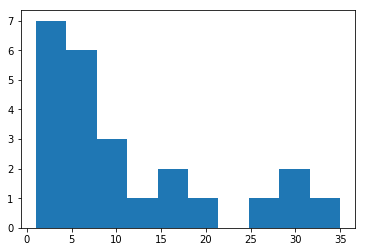

In [135]:
sddf = pd.DataFrame(stan_data)
n1 = sddf.groupby(["u1s", "items"]).count()["distances"].groupby("u1s").count()
plt.hist(n1)
plt.show()

In [136]:
(n1.values / 191).mean()

0.05846422338568935

In [137]:
stan_data["NUSERS"], stan_data["NITEMS"]

(25, 293)

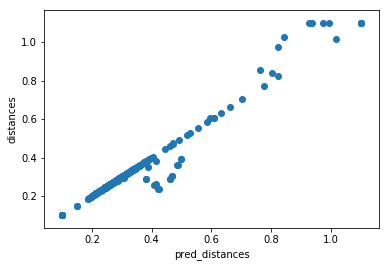

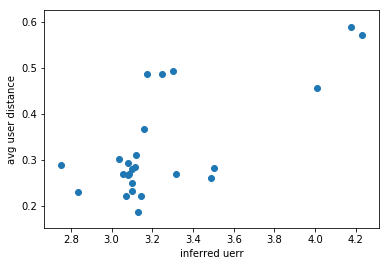

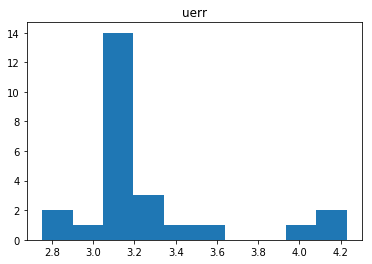

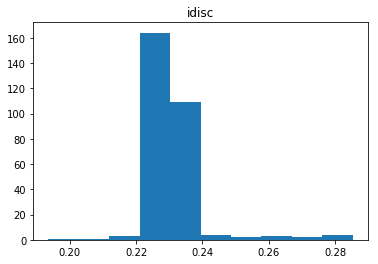

In [138]:
plt.scatter(opt["pred_distances"], stan_data["distances"])
plt.xlabel("pred_distances")
plt.ylabel("distances")
plt.show()
uerr_b = experiments.uerr_baseline(stan_data)
plt.scatter(opt["uerr"], uerr_b)
plt.xlabel("inferred uerr")
plt.ylabel("avg user distance")
plt.show()
plt.title("uerr")
plt.hist(opt["uerr"])
plt.show()
plt.title("idisc")
plt.hist(opt["disc"])
plt.show()

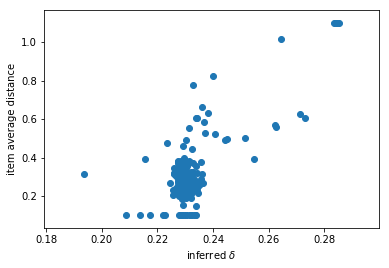

In [139]:
sddf = pd.DataFrame(stan_data)
diff_b = sddf.groupby("items").mean()["distances"].to_dict()
diff_m = dict([(i+1, v) for i, v in enumerate(opt["disc"]) if i+1 in diff_b.keys()])
plt.scatter(diff_m.values(), diff_b.values())
plt.xlabel("inferred $\delta$")
plt.ylabel("item average distance")
# plt.title("Item Diagnostic")
plt.show()

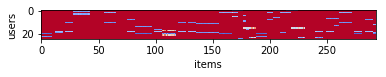

In [140]:
per_item_user_rankings = experiments.get_model_user_rankings(opt, debug=True)

In [141]:
random = experiments.get_baseline_random(crowd_df, "label", "itemID")
faveu = experiments.get_baseline_global_best_user(stan_data, crowd_df, "label", "itemID", "worker")
center = experiments.get_baseline_item_centrallest(stan_data, crowd_df, "label", "itemID", "worker")
model4 = experiments.get_preds(crowd_df, per_item_user_rankings, "label", "itemID", "worker")

In [142]:
oracle = experiments.get_oracle_preds(stan_data, crowd_df, "label", "itemID", "worker", bleu_multi, golddict)


In [143]:

_ = experiments.eval_preds_vs(random, faveu, golddict, bleu_multi)
_ = experiments.eval_preds_vs(random, center, golddict, bleu_multi)
_ = experiments.eval_preds_vs(random, model4, golddict, bleu_multi)
_ = experiments.eval_preds_vs(random, oracle, golddict, bleu_multi)

0.2594321835764801 0.25916334894004955
t-test Ttest_relResult(statistic=0.043452406097861745, pvalue=0.9653706015112382)
z-score -0.002542859729062939
baseline below thresh 0.0
model below thresh 0.0
0.2594321835764801 0.26012535838681383
t-test Ttest_relResult(statistic=-0.1139223217339151, pvalue=0.9093776593676424)
z-score 0.006666799613492051
baseline below thresh 0.0
model below thresh 0.0
0.2594321835764801 0.2739370532168683
t-test Ttest_relResult(statistic=-2.502016932722017, pvalue=0.01289578594021172)
z-score 0.14641946605496436
baseline below thresh 0.0
model below thresh 0.0
0.2594321835764801 0.30153356960252514
t-test Ttest_relResult(statistic=-9.342339129650279, pvalue=2.5174025965488974e-18)
z-score 0.5467190446147843
baseline below thresh 0.0
model below thresh 0.0


item 107
    u1s  u2s  distances
79   21   18    0.30432
80   21   22    0.30432
81   18   22    1.10000


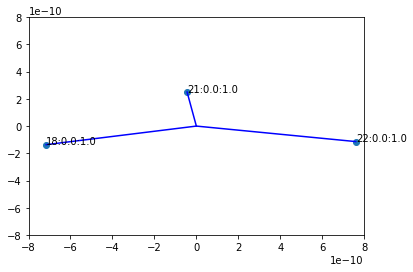

item 108
    u1s  u2s  distances
82   22   18   0.838752
83   22   21   0.353943
84   18   21   0.380841


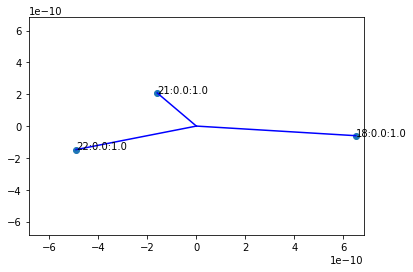

item 109
    u1s  u2s  distances
85   22   18   1.100000
86   22   21   0.393274
87   18   21   0.393274


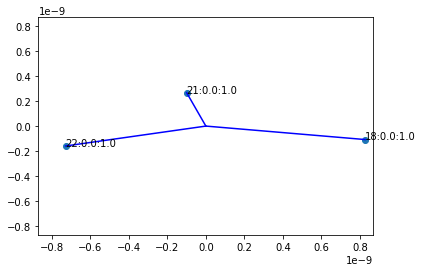

item 111
    u1s  u2s  distances
89   18   21    0.35928
90   18   22    1.10000
91   21   22    0.35928


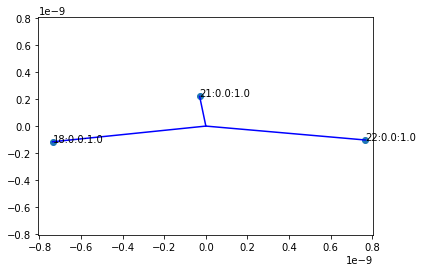

item 112
    u1s  u2s  distances
92   21   18   0.338738
93   21   22   0.255282
94   18   22   0.470385


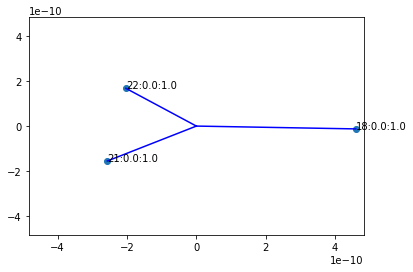

item 113
    u1s  u2s  distances
95   21   18   0.290312
96   21   22   0.290312
97   18   22   0.853922


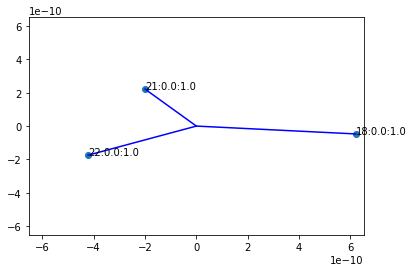

item 114
     u1s  u2s  distances
98    21   18   0.320482
99    21   22   0.298176
100   18   22   0.517485


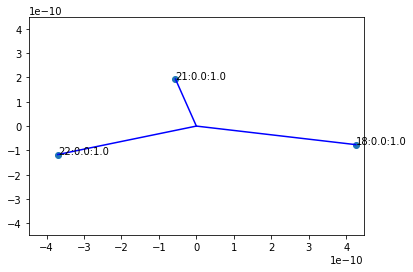

item 115
     u1s  u2s  distances
101   18   21   0.238733
102   18   22   1.028281
103   21   22   0.235202


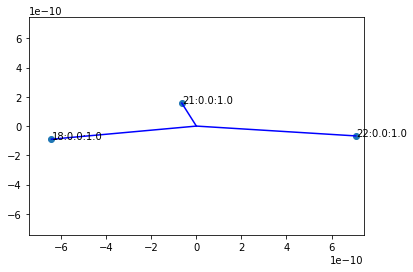

item 116
     u1s  u2s  distances
104   21   18   0.264307
105   21   22   0.257636
106   18   22   0.973626


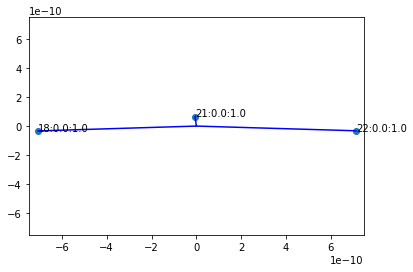

item 117
     u1s  u2s  distances
107   22   18    1.10000
108   22   21    0.28851
109   18   21    0.28851


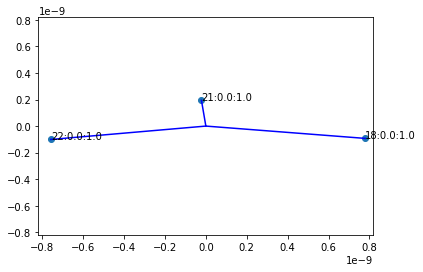

item 118
     u1s  u2s  distances
110   22   18   0.476752
111   22   21   0.243124
112   18   21   0.226488


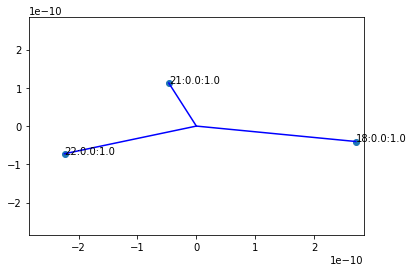

item 168
     u1s  u2s  distances
158    3    6   0.604860
159    3    1   0.276340
160    6    1   0.296415


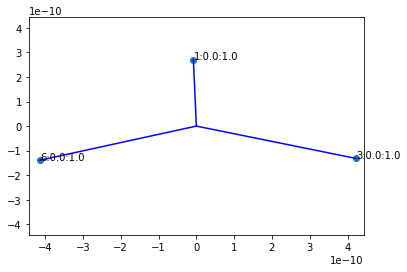

item 169
     u1s  u2s  distances
161    6    1   0.295642
162    6    3   0.358993
163    1    3   0.295642


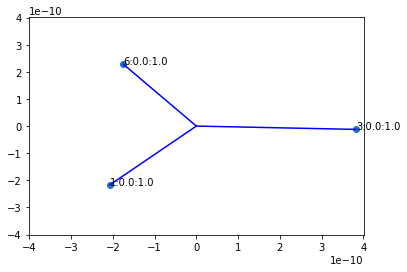

item 170
     u1s  u2s  distances
164    3    6        0.1
165    3    1        0.1
166    6    1        0.1


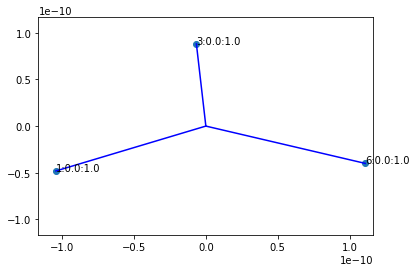

item 171
     u1s  u2s  distances
167    3    6   0.185933
168    3    1   0.237441
169    6    1   0.224910


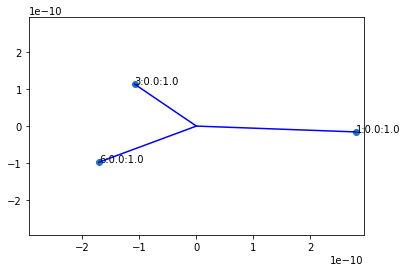

item 172
     u1s  u2s  distances
170    3    6   0.262257
171    3    1   0.241498
172    6    1   0.403156


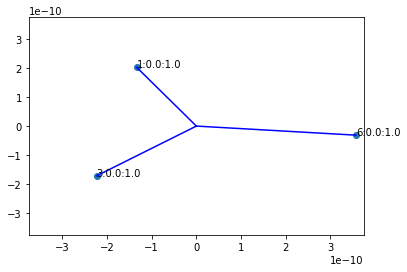

item 178
     u1s  u2s  distances
178    5   16   0.208137
179    5   10   0.237655
180   16   10   0.356553


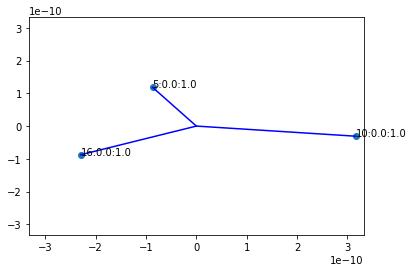

item 179
     u1s  u2s  distances
181    5   16   0.239700
182    5   10   0.197680
183   16   10   0.282617


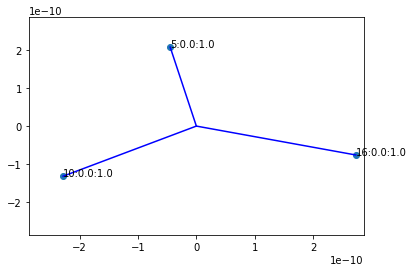

item 291
     u1s  u2s  distances
280   20   13   0.703248
281   20   21   0.386507
282   13   21   0.386507


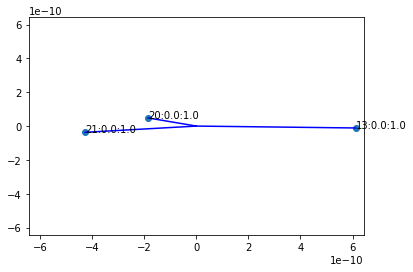

item 292
     u1s  u2s  distances
283   20   13   0.276478
284   20   21   0.250495
285   13   21   0.264749


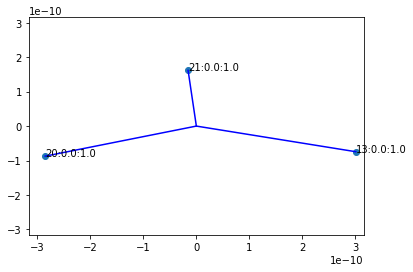

item 293
     u1s  u2s  distances
286   21   20   0.231979
287   21   13   0.298633
288   20   13   0.268575


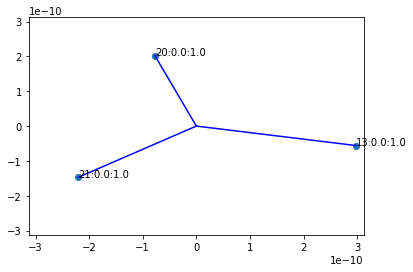

In [65]:
utils.visualize_embeddings(stan_data, opt)

gold eval : BLEU score

In [390]:
crowd_df[crowd_df["label"].isin(model4.values())]

,item,itemID,label,worker,doc,seg,status,hit
140,مخلوط تعلیم پر پابندی: طالبان,0,Ban on coeducation: Taliban,20,BBC_URD_20090104.0004,1,Approved,XZDRNTZP2W7Y0NZBVWA0
149,زخمی کو بنوں سول ہسپتال میں داخل کردیاگیا ہے۔,1,Injured has been admitted in Civil Hospital.,20,BBC_URD_20090104.0004,10,Approved,XZDRNTZP2W7Y0NZBVWA0
141,شمالی وزیرستان کے صدر مقام میران شاہ اور دوسری تحصیلوں میں حافظ گل بہادر گروپ کے مقامی طالبان نے ایک پمفلٹ تقسیم کیا ہے جس میں سرکاری اور نیم سرکاری ان تعلیمی اداروں کو دھمکی دی گئی ہے جن میں لڑکوں اور لڑکیوں کو مخلوط تعلیم دی جارہی ہے۔,2,Local Talibans of Gul Bahadur group have distributed a pamphlet in Miran Shah (Capital of Southern Waziristan) and in other Tehsils in which government and semi government coeducational institutes have been threatened.,20,BBC_URD_20090104.0004,2,Approved,XZDRNTZP2W7Y0NZBVWA0
142,پمفلٹ میں کہاگیا ہے کہ اگر پانچ جنوری تک مخلوط تعلیمی اداروں کو بند نہیں کیاگیا تو ان کے خلاف کارروائی شروع کردی جائے گی۔,3,"Pamphlet included that if coeducation institutes are not closed till 5th of January, action will be taken against them.",20,BBC_URD_20090104.0004,3,Approved,XZDRNTZP2W7Y0NZBVWA0
143,پمفلٹ میں کہاگیا ہے کہ سرکاری امداد اور دیگر تعلیمی امور کے لیے خواتین کے شناختی کارڈ بنوانے پر پابندی ہوگی اور خواتین کو تمام تحصیلوں میں نادرا کے دفاتر پر جانے سے بھی منع کردیا ہے۔,4,Pamphlet said that women are banned to have ID Cards for government aid and for educational purposes and women are prohibited to go to NADRA's Offices in all Tehsils.,20,BBC_URD_20090104.0004,4,Approved,XZDRNTZP2W7Y0NZBVWA0
144,مقامی طالبان کی جانب سے خواتین کے شناختی کارڈ بنوانے پر پابندی کا اعلان ایک ایسے موقع پر کیاگیا ہے جب شمالی وزیرستان میں بے نظیرانکم سپورٹ پروگرام کے لیے نادرہ کے دفاتر میں تقریباً دو سو خواتین نے شناختی کارڈ بنوانے کے لیے فارم جمع کیے ہیں۔,5,The announcement on the ban of women ID Card has been made at the time when almost 200 women have submitted forms in NADRA Offices in Southern Waziristan for Benazir Income Support Program.,20,BBC_URD_20090104.0004,5,Approved,XZDRNTZP2W7Y0NZBVWA0
145,مقامی لوگوں کے مطابق طالبان کی جانب سے جاری ہونے والے پمفلٹ کو شمالی وزیرستان کے تمام مساجد کے لاؤڈسپیکر پر پڑھ کر سنایا گیا,6,According to local people the pamphlet issued by Taliban was announced on the loudspeakers of all the Masjids.,20,BBC_URD_20090104.0004,6,Approved,XZDRNTZP2W7Y0NZBVWA0
146,تاہم خط میں اس بات کا ذکر نہیں کیاگیا ہے کہ لڑکیوں کی الگ تعلیمی ادارے پر بھی پابندی ہوگی یا نہیں۔,7,However it was not mentioned in the letter that separate educational institute for woman are banned or not.,20,BBC_URD_20090104.0004,7,Approved,XZDRNTZP2W7Y0NZBVWA0
147,پمفلٹ کے مطابق اس اعلان کے بعد تعلیم حاصل کرنے کے لیے یا شناختی کارڈ بنانے کے لیے کوئی بھی عورت سکول یا نادرا کی آفس گئی تو پکڑنے جانے کی صورت میں اس عورت اور اس کے اہل خانہ کو شرعی سزا دی جائے گی۔,8,According to Pamphlet after this announcement any woman caught in the school for getting education or in NADRA's Office for having ID Card will be punished religiously along with her family.,20,BBC_URD_20090104.0004,8,Approved,XZDRNTZP2W7Y0NZBVWA0
148,اس کے علاوہ ضلع بنوں میں پولیس کا کہنا ہے کہ اتوار کو بنوں میرانشاہ روڈ پر ایک بارودی سرنگ کا دھماکہ ہوا ہے جس کے نتیجہ میں ایک راہ گیر ہلاک جبکہ ایک زخمی ہوگیا ہے۔,9,Moreover Police of District Bannu says on Sunday a landmine exploded on Miram Shah Bannu Road in result of that a traveler died and one is injured.,20,BBC_URD_20090104.0004,9,Approved,XZDRNTZP2W7Y0NZBVWA0


In [391]:
(crowd_df[crowd_df["label"].isin(random.values())].status=="Approved").mean()

0.5195195195195195

In [392]:
(crowd_df[crowd_df["label"].isin(model4.values())].status=="Approved").mean()

0.5709677419354838

Reason this is pretty mild:
Random basically imitates having one user label per item. The more redundancy you have the better you should expect to do versus random. In this experiment the amount of redundancy is minimal, so not THAT much better than random.